In [195]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

In [175]:
a = np.array([5, 5, 1, 9, 4])
a

array([5, 5, 1, 9, 4])

#### Дисперсия и стандартное отклонение

- Дисперсия показывает разброс каждого из значений выборки относительно среднего
- Стандартное отклонение - это корень из дисперсии, который оказывается более удобен для восприятия, поскольку его проще сравнивать со средним, чем дисперсию

In [176]:
# Variance
print('Variance:', np.sum((a - np.mean(a))**2)/a.size)

# Std. deviation
print('Std. deviation:', np.sqrt(np.sum((a - np.mean(a))**2)/a.size))

Variance: 6.56
Std. deviation: 2.5612496949731396


Несмещенная дисперсия нужна, чтобы приблизить правду по выборке к ГС.
Вычитаем из знаменателя единичку. От этого дисперсия вырастает. И мы так имеем ввиду более высокий разброс

Чем больше данных, тем меньше эффект от несмещенности<br>
**Нужно использовать несмещенную дисперсию!**

In [177]:
# Сравнение обычной дисперсии и несмещенной
np.var(a), np.var(a, ddof=1)

(6.56, 8.2)

#### Коэффициент вариации
Позволяет оценить вариативность в процентах

In [178]:
np.std(a)/np.mean(a), np.std(a, ddof=1)/np.mean(a)

(0.5335936864527374, 0.5965758776365148)

#### Правило 3 сигм
*Правило 3 сигм или правило 68 - 95 - 99,7*

Только для нормального распределения<br>
Разброс случайной величины на диапазон более 3 стандартных отклонений от среднего практически равен нулю (менее 0,3%)

ЦПТ
Позволяет оценивать доверительный интервал для среднего<br>
Если брать из любой ГС случайные подвыборки, то их средние будут распределены нормально.
Мат ожидание и дисперсия не будут сильно отличаться от ГС

#### Возьмем для примера равномерное распределение

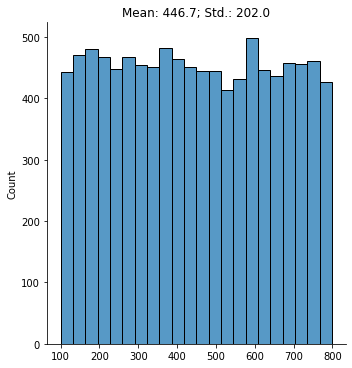

In [123]:
x = np.random.randint(100,800,10000)
sns.displot(x)
plt.title('Mean: {:.1f}; Std.: {:.1f}'.format(np.mean(x), np.std(x)));

#### Попробуем брать случайный подвыборки, и проверим как у них распределено среднее
- В итоге мы получаем распределение средних похожее на нормальное
- Чем больше подвыборки, тем выше нормальность распределения средних

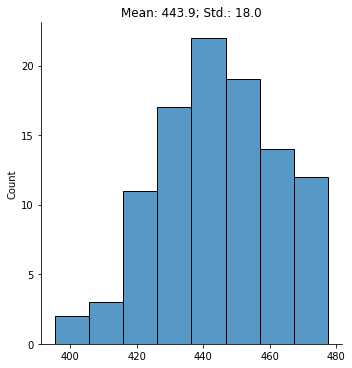

In [136]:
_mu = []
for i in range(100):
    _x = np.random.choice(x, 100)
    
    _mu.append(np.mean(_x))

sns.displot(_mu);
plt.title('Mean: {:.1f}; Std.: {:.1f}'.format(np.mean(_mu), np.std(_mu)));

#### Посчитаем доверительные интервалы полученного среднего для двух сигм
**Среднее изначальной выборки (ГС) лежит в пределах этого интервала**

In [137]:
left = np.mean(_mu) - np.std(_mu)*2
right = np.mean(_mu) + np.std(_mu)*2
print(left, right)

407.95928767334397 479.92691232665595


#### Но брать много подвыборок не всегда возможно
Есть другой способ получить те же данных из одной выборки. Для этого используется стандртная ошибка среднего $SE$<br>
$SE$ показывает, в каких пределах лежит среднее генеральной совокупности

In [186]:
# возьмем только одну случайную подвыборку
_x_ = np.random.choice(x, 100)

_mu_ = np.mean(_x_)
_std_ = np.std(_x_)

# рассчитаем se
se = _std_/np.sqrt(_x_.size)
print(
    'Mean', _mu_, 
    'Std.', _std_, 
    'SE', se)

Mean 431.24 Std. 196.65900030255418 SE 19.66590003025542


#### Снова посчитаем доверительные интервалы полученного среднего для двух сигм
**И мы получим почти такой же диапазон как и в случае с множеством подвыборок, который показывает где может лежать среднее всей ГС с 95% вероятностью**

In [187]:
left = _mu_ - se*2
right = _mu_ + se*2
print(left, right)

391.9081999394892 470.57180006051084


#### Как выборочное среднее приближается к среднему ГС при росте выборки

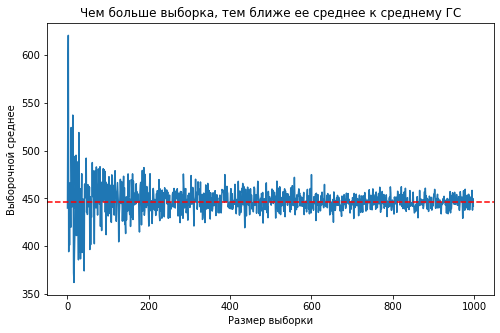

In [169]:
mean_var_list = []

for i in range(1,1000):
    _x_ = np.random.choice(x, i)
    x_mean = np.mean(_x_)
    mean_var_list.append(x_mean)
    
plt.figure(figsize=(8,5))

plt.title('Чем больше выборка, тем ближе ее среднее к среднему ГС')
plt.xlabel('Размер выборки')
plt.ylabel('Выборочной среднее')

plt.plot(mean_var_list)
plt.axhline(x.mean(), color='r', linestyle='--');